In this notebook, I'll implement the k-means clustering algorithm on synthetically generated data. Let's import the necessary libraries.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', None)

We create three synthetic clusters by sampling 10 observations from a normal distribution for each one. The features represented in the dataset are age, income, and spending score.

In [3]:
cluster1 = np.random.normal(loc=[25, 1400, 40], scale=[5, 500, 10], size=(10, 3))
cluster2 = np.random.normal(loc=[40, 3000, 80], scale=[6, 400, 15], size=(10, 3))
cluster3 = np.random.normal(loc=[60, 600, 20], scale=[10, 300, 5], size=(10, 3))

age, income, score = int(cluster1[:1][0][0]), int(cluster1[:1][0][1]), int(cluster1[:1][0][2]) 

print(f'As an example, this hypothetical person is {age} years old, has an income of ${income:,}, and a spending score of {score}.')

As an example, this hypothetical person is 25 years old, has an income of $1,178, and a spending score of 40.


We combine the three clusters and create a dataframe with proper column names.

In [4]:
# combine
data = np.vstack([cluster1, cluster2, cluster3])

# DataFrame
df = pd.DataFrame(data, columns=["Age", "Income", "SpendingScore"])

df.head()

,Age,Income,SpendingScore
0,25.873,"1,178.366",40.641
1,29.876,"1,248.728",39.045
2,22.147,753.133,40.334
3,24.840,"1,336.227",37.026
4,27.395,635.875,40.205


Let's visualize the dataset in 3D using `plotly`.

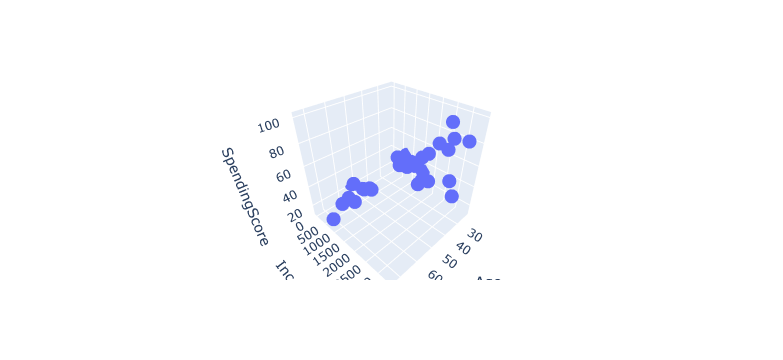

In [5]:
fig = px.scatter_3d(df, x='Age', y='Income', z='SpendingScore')

fig.show()

**Elbow Method For Ideal Cluster Number In K-Means**    
    
K-Means is a clustering algorithm. The way the algorithm works:
- We choose the cluster number (k) as an input for the algorithm. For instance k=3.
- Algorithm sets k=3 start points (centroids) arbitrarily.
- Algorithm appoints each data point to the nearest centroid. When all data points are appointed, we have k different clusters.
- Centroids are being recalculated.
- Last 2 steps will repeat untill there is no change for centroids.    
    
    
For other clustering algorithms click [here](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods).

---
What is the ideal number of clusters ? Elbow method is a common method that helps answering this question. In this method, we need to run K-Means algorithm for each pre-specified k value. Each time we calculate WCSS, in other word **Inertia**. We draw a line graph. The breaking point or the near points can be the ideal number of clusters.

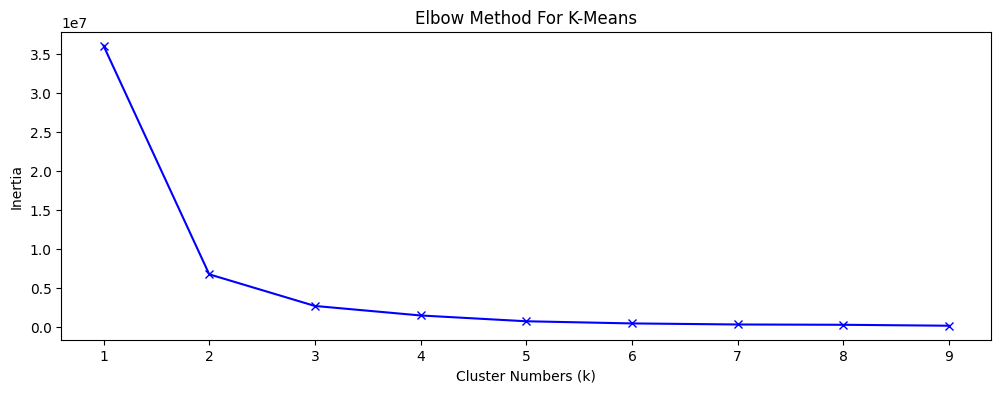

In [6]:
inertias = {}

# run k-means for each k value and calculate inertia
for cluster_number in range(1, 10):
    kmeanModel = KMeans(n_clusters=cluster_number, random_state=42).fit(df)
    inertias[cluster_number] = kmeanModel.inertia_
    
# draw a line graph of inertias across different k values
plt.figure(figsize=(12, 4))
plt.plot(range(1, 10), inertias.values(), 'bx-')
plt.xlabel('Cluster Numbers (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For K-Means')
plt.show()

Let's implement the K-Means algorithm for 3 clusters. We'll use only 2 parameters of the KMeans algorithm: `n_clusters` and `random_state`. 
- We can determine the number of clusters as well as the number of centroids to generate with `n_clusters`.
- We use an int for `random_state` to make randomness for centroid initialization deterministic.
    
There are lots of other parameters we can utilize such as `init`, `n_init`, and `max_iter`. But for simplicity we'll go with default values for those parameters.

In [7]:
# k-means algorithm set
kmeans = KMeans(n_clusters=3, random_state=42)

# apply on synthetic data and create a cluster column
df['Cluster'] = kmeans.fit_predict(df)

df.head()

,Age,Income,SpendingScore,Cluster
0,25.873,"1,178.366",40.641,2
1,29.876,"1,248.728",39.045,2
2,22.147,753.133,40.334,1
3,24.840,"1,336.227",37.026,2
4,27.395,635.875,40.205,1


As a final step, let's visualize the dataset in 3D and color the each point according to their cluster.

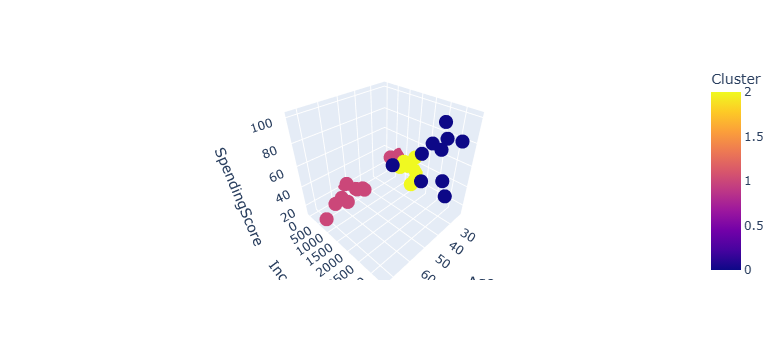

In [8]:
fig = px.scatter_3d(df, x='Age', y='Income', z='SpendingScore', color='Cluster')

fig.show()